Note: when this section done, paste it below Data Cleaning Part in the Final Project file.

In [30]:
import pandas as pd
import numpy as np
from numpy import nan as Nan

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.image as mpimg
from matplotlib import rcParams
plt.rcParams['figure.figsize'] = (17, 7) # add --YD

import seaborn as sns # add -- YD

from IPython.display import Image, display

import requests
from string import digits
import wget 
import glob
import time

import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import patsy
import psutil

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import plotly.figure_factory as ff
import xml.etree.ElementTree as ET # to read one dataset in XML format

%config InlineBackend.figure_format = 'retina'

In [66]:
merged_X_df = pd.read_csv("datasets/merged/merged_X.csv")
Y = pd.read_csv("datasets/merged/Y.csv")

merged_X_df = merged_X_df.rename(columns = {"Unnamed: 0":"airport_code"})
merged_X_df = merged_X_df.set_index("airport_code")

Y = Y.rename(columns = {"Unnamed: 0":"airport_code"})
Y = Y.set_index("airport_code")

=======================================================================================

# Data Analysis & Results

## EDA

In [69]:
merged_X_df.columns

Index(['total_departure', 'total_arrival', 'total_departure_lg10',
       'total_arrival_lg10', 'averge_departure_distance',
       'averge_arrival_distance', 'average_departure_taxi',
       'average_arrival_taxi', 'city_name', 'code4', 'latitude', 'longitude',
       'altitude_ft', 'city_id', 'fips', 'population', 'temp_avg', 'pcp_avg',
       'strike_avg', 'damage_avg', 'enplanements', 'length_ft_sum',
       'width_ft_avg', 'runway_count'],
      dtype='object')

In [70]:
Y.columns

Index(['average_departure_delay', 'average_arrival_delay',
       'average_departure_cancelled', 'average_arrival_diverted'],
      dtype='object')

In [71]:
def generate_bubble_map(df,column,limits,color,title,scale=1):

    if not (column in df.columns):
        print("column \""+column+"\"","not found in dataframe")
        return
    
    if not ('longitude' in df.columns and 'latitude' in df.columns):
        print("longitude or latitude not present in df")
        return
    if not (limits[0][0] <= df[column].min()):
        print("lower limit is higher then some of the rows")
        print("df[" + column + "].min()=",df[column].min())
    
    if not (limits[len(limits)-1][1] >= df[column].max()):
        print("upper limit is lower then some of the rows")
        print("df[" + column + "].max()=",df[column].max())
    
    #preprocess color
    colorseries={
        "blue":["#f7fbff", "#ebf3fb", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
                "#85bcdb", "#6baed6", "#57a0ce", "#3082be", "#2171b5", "#1361a9",
                "#08519c", "#0b4083", "#08306b"],
        "gray":["#ffffff","#eeeeee","#dddddd","#cccccc","#bbbbbb","#aaaaaa","#999999","#888888"],
        "thermal":["#00000a","#000014","#00001e","#000025","#00002a","#00002e","#000032","#000036","#00003a","#00003e","#000042","#000046","#00004a","#00004f","#000052","#010055","#010057","#020059","#02005c","#03005e","#040061","#040063","#050065","#060067","#070069","#08006b","#09006e","#0a0070","#0b0073","#0c0074","#0d0075","#0d0076","#0e0077","#100078","#120079","#13007b","#15007c","#17007d","#19007e","#1b0080","#1c0081","#1e0083","#200084","#220085","#240086","#260087","#280089","#2a0089","#2c008a","#2e008b","#30008c","#32008d","#34008e","#36008e","#38008f","#390090","#3b0091","#3c0092","#3e0093","#3f0093","#410094","#420095","#440095","#450096","#470096","#490096","#4a0096","#4c0097","#4e0097","#4f0097","#510097","#520098","#540098","#560098","#580099","#5a0099","#5c0099","#5d009a","#5f009a","#61009b","#63009b","#64009b","#66009b","#68009b","#6a009b","#6c009c","#6d009c","#6f009c","#70009c","#71009d","#73009d","#75009d","#77009d","#78009d","#7a009d","#7c009d","#7e009d","#7f009d","#81009d","#83009d","#84009d","#86009d","#87009d","#89009d","#8a009d","#8b009d","#8d009d","#8f009c","#91009c","#93009c","#95009c","#96009b","#98009b","#99009b","#9b009b","#9c009b","#9d009b","#9f009b","#a0009b","#a2009b","#a3009b","#a4009b","#a6009a","#a7009a","#a8009a","#a90099","#aa0099","#ab0099","#ad0099","#ae0198","#af0198","#b00198","#b00198","#b10197","#b20197","#b30196","#b40296","#b50295","#b60295","#b70395","#b80395","#b90495","#ba0495","#ba0494","#bb0593","#bc0593","#bd0593","#be0692","#bf0692","#bf0692","#c00791","#c00791","#c10890","#c10990","#c20a8f","#c30a8e","#c30b8e","#c40c8d","#c50c8c","#c60d8b","#c60e8a","#c70f89","#c81088","#c91187","#ca1286","#ca1385","#cb1385","#cb1484","#cc1582","#cd1681","#ce1780","#ce187e","#cf187c","#cf197b","#d01a79","#d11b78","#d11c76","#d21c75","#d21d74","#d31e72","#d32071","#d4216f","#d4226e","#d5236b","#d52469","#d62567","#d72665","#d82764","#d82862","#d92a60","#da2b5e","#da2c5c","#db2e5a","#db2f57","#dc2f54","#dd3051","#dd314e","#de324a","#de3347","#df3444","#df3541","#df363d","#e0373a","#e03837","#e03933","#e13a30","#e23b2d","#e23c2a","#e33d26","#e33e23","#e43f20","#e4411d","#e4421c","#e5431b","#e54419","#e54518","#e64616","#e74715","#e74814","#e74913","#e84a12","#e84c10","#e84c0f","#e94d0e","#e94d0d","#ea4e0c","#ea4f0c","#eb500b","#eb510a","#eb520a","#eb5309","#ec5409","#ec5608","#ec5708","#ec5808","#ed5907","#ed5a07","#ed5b06","#ee5c06","#ee5c05","#ee5d05","#ee5e05","#ef5f04","#ef6004","#ef6104","#ef6204","#f06303","#f06403","#f06503","#f16603","#f16603","#f16703","#f16803","#f16902","#f16a02","#f16b02","#f16b02","#f26c01","#f26d01","#f26e01","#f36f01","#f37001","#f37101","#f37201","#f47300","#f47400","#f47500","#f47600","#f47700","#f47800","#f47a00","#f57b00","#f57c00","#f57e00","#f57f00","#f68000","#f68100","#f68200","#f78300","#f78400","#f78500","#f78600","#f88700","#f88800","#f88800","#f88900","#f88a00","#f88b00","#f88c00","#f98d00","#f98d00","#f98e00","#f98f00","#f99000","#f99100","#f99200","#f99300","#fa9400","#fa9500","#fa9600","#fb9800","#fb9900","#fb9a00","#fb9c00","#fc9d00","#fc9f00","#fca000","#fca100","#fda200","#fda300","#fda400","#fda600","#fda700","#fda800","#fdaa00","#fdab00","#fdac00","#fdad00","#fdae00","#feaf00","#feb000","#feb100","#feb200","#feb300","#feb400","#feb500","#feb600","#feb800","#feb900","#feb900","#feba00","#febb00","#febc00","#febd00","#febe00","#fec000","#fec100","#fec200","#fec300","#fec400","#fec500","#fec600","#fec700","#fec800","#fec901","#feca01","#feca01","#fecb01","#fecc02","#fecd02","#fece03","#fecf04","#fecf04","#fed005","#fed106","#fed308","#fed409","#fed50a","#fed60a","#fed70b","#fed80c","#fed90d","#ffda0e","#ffda0e","#ffdb10","#ffdc12","#ffdc14","#ffdd16","#ffde19","#ffde1b","#ffdf1e","#ffe020","#ffe122","#ffe224","#ffe226","#ffe328","#ffe42b","#ffe42e","#ffe531","#ffe635","#ffe638","#ffe73c","#ffe83f","#ffe943","#ffea46","#ffeb49","#ffeb4d","#ffec50","#ffed54","#ffee57","#ffee5b","#ffee5f","#ffef63","#ffef67","#fff06a","#fff06e","#fff172","#fff177","#fff17b","#fff280","#fff285","#fff28a","#fff38e","#fff492","#fff496","#fff49a","#fff59e","#fff5a2","#fff5a6","#fff6aa","#fff6af","#fff7b3","#fff7b6","#fff8ba","#fff8bd","#fff8c1","#fff8c4","#fff9c7","#fff9ca","#fff9cd","#fffad1","#fffad4","#fffbd8","#fffcdb","#fffcdf","#fffde2","#fffde5","#fffde8","#fffeeb","#fffeee","#fffef1","#fffef4","#fffff6"],
        "black":["#bbbbbb","#aaaaaa","#999999","#888888","#777777","#666666","#555555","#444444","#333333","#222222","#111111","#000000"]
    }
    colors = list()
    inds = list(np.linspace(0,len(colorseries[color])-1,len(limits)).astype("int"))
    for i in inds:
        colors.append(colorseries[color][i])
        
    scale *= 250 / (df[column].max() - df[column].min())
    
    fig = go.Figure()
    for i in range(len(limits)):
        lim = limits[i]
        df_sub = df[(lim[0]<=df[column]) & (df[column]<lim[1])]
        fig.add_trace(go.Scattergeo(
            locationmode = 'USA-states',
            lon = df_sub['longitude'],
            lat = df_sub['latitude'],
            text = df_sub.index,
            marker = dict(
                size = (df_sub[column] - df[column].min())*scale, # ensure size is positive
                color = colors[i],
                line_color='rgb(40,40,40)',
                line_width=0,
                sizemode = 'area'
            ),
            name = '{0} - {1}'.format(lim[0],lim[1])))

    fig.update_layout(
            title_text = title,
            showlegend = True,
            geo = dict(
                scope = 'usa',
                landcolor = 'rgb(217, 217, 217)',
            )
        )
    return fig

#### EDA Outline:

3.1 intro (size/structure/missingness)

3.2 granularity

3.3 scope:

    latitude, longitude, temp_avg, pcp_avg
    population

3.4 Faithfulness:

    total_departure, total_arrival, total_departure_lg10, total_arrival_lg10, averge_departure_distance, averge_arrival_distance
    average_departure_taxi, average_arrival_taxi
    strike_avg, damage_avg, altitude_ft
    enplanements
    length_ft_sum, width_ft_avg, runway_count
    
city_name, code4, city_id, fips (unuseful)

## Size

In [72]:
merged_X_df.shape

(312, 24)

In [73]:
Y.shape

(312, 4)

## Structure

In [74]:
merged_X_df.dtypes

total_departure              float64
total_arrival                float64
total_departure_lg10         float64
total_arrival_lg10           float64
averge_departure_distance    float64
averge_arrival_distance      float64
average_departure_taxi       float64
average_arrival_taxi         float64
city_name                     object
code4                         object
latitude                     float64
longitude                    float64
altitude_ft                  float64
city_id                        int64
fips                           int64
population                     int64
temp_avg                     float64
pcp_avg                      float64
strike_avg                   float64
damage_avg                   float64
enplanements                 float64
length_ft_sum                float64
width_ft_avg                 float64
runway_count                 float64
dtype: object

In [75]:
Y.dtypes

average_departure_delay        float64
average_arrival_delay          float64
average_departure_cancelled    float64
average_arrival_diverted       float64
dtype: object

## Missingness

In [76]:
merged_X_df.isna().sum().sum() + Y.isna().sum().sum()

0

## Granularity

## Scope

### Geographic scope

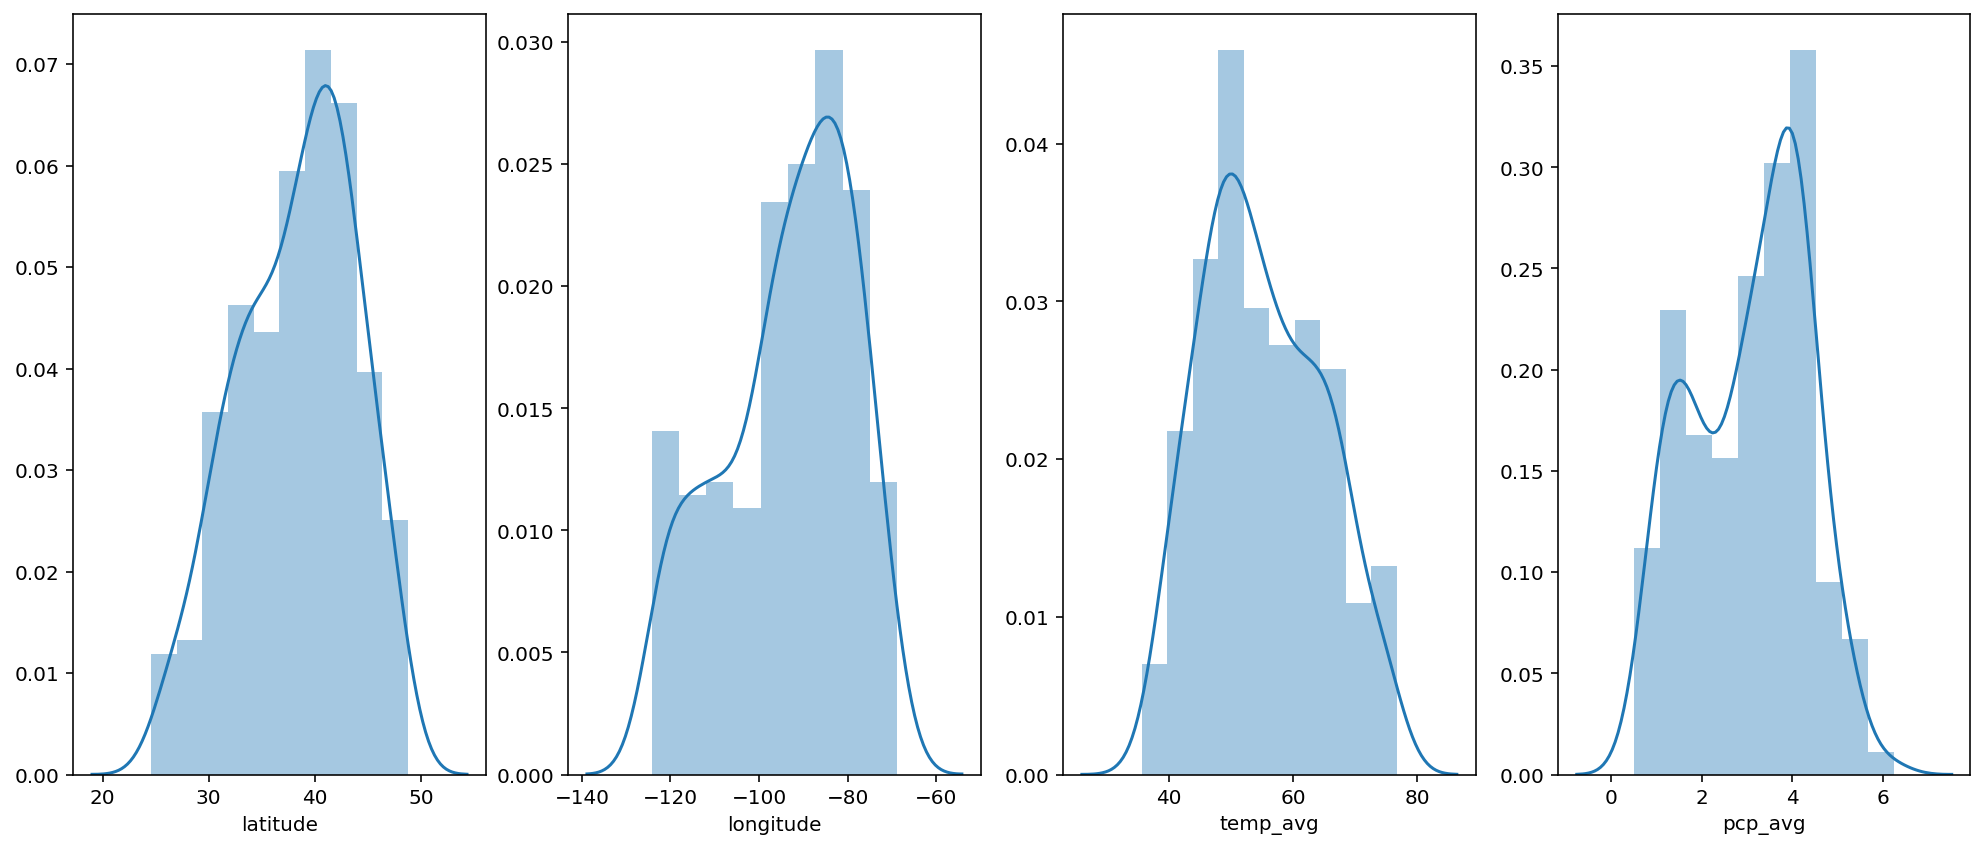

In [77]:
plt.subplot(1, 4, 1)
sns.distplot(merged_X_df["latitude"])
plt.subplot(1, 4, 2)
sns.distplot(merged_X_df["longitude"]);
plt.subplot(1, 4, 3)
sns.distplot(merged_X_df["temp_avg"]);
plt.subplot(1, 4, 4)
sns.distplot(merged_X_df["pcp_avg"]);

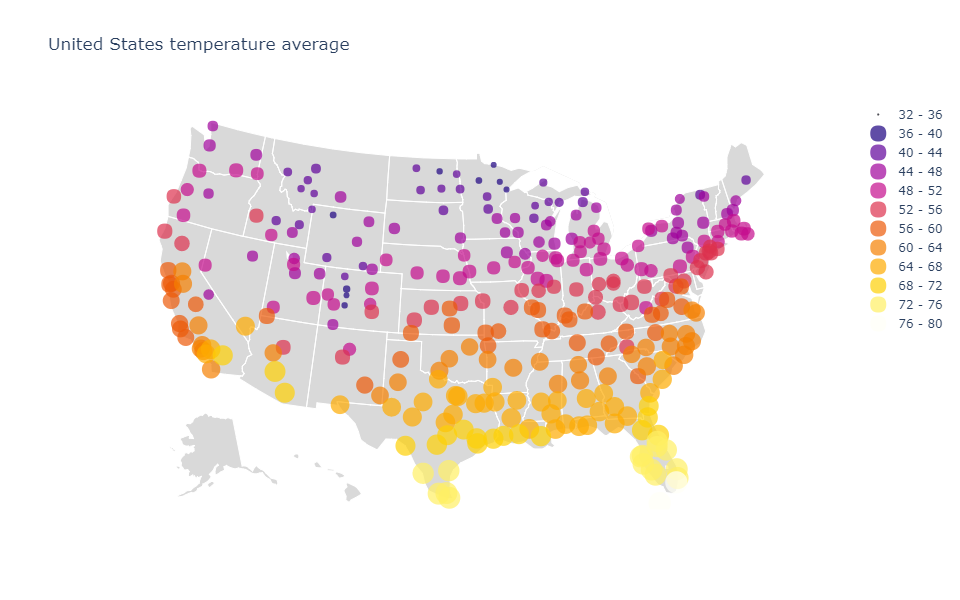

In [78]:
fig = generate_bubble_map(merged_X_df,
                          column="temp_avg",
                          limits=[(32,36),(36,40),(40,44),(44,48),(48,52),(52,56),(56,60),(60,64),(64,68),(68,72),(72,76),(76,80)],
                          color="thermal",
                          title='United States temperature average')
fig.write_image("images/temp.png",width=960,height=600)
display(Image(filename='images/temp.png'))

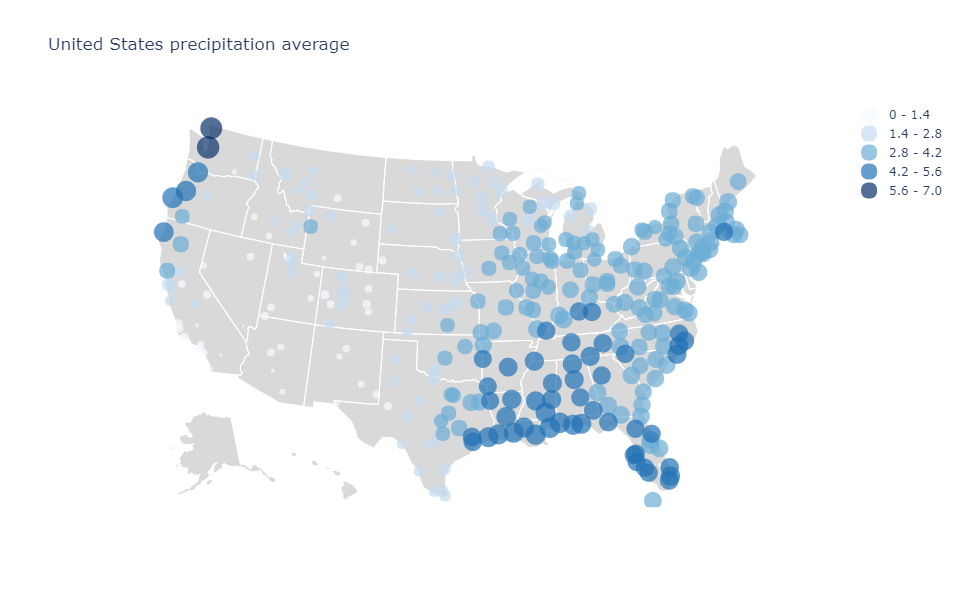

In [79]:
fig = generate_bubble_map(merged_X_df,
                          column="pcp_avg",
                          limits=[(0,1.4),(1.4,2.8),(2.8,4.2),(4.2,5.6),(5.6,7.0)],
                          color="blue",
                          title='United States precipitation average')
#fig.show()
fig.write_image("images/pcp.png",width=960,height=600)
display(Image(filename='images/pcp.png'))

### Demographic scope

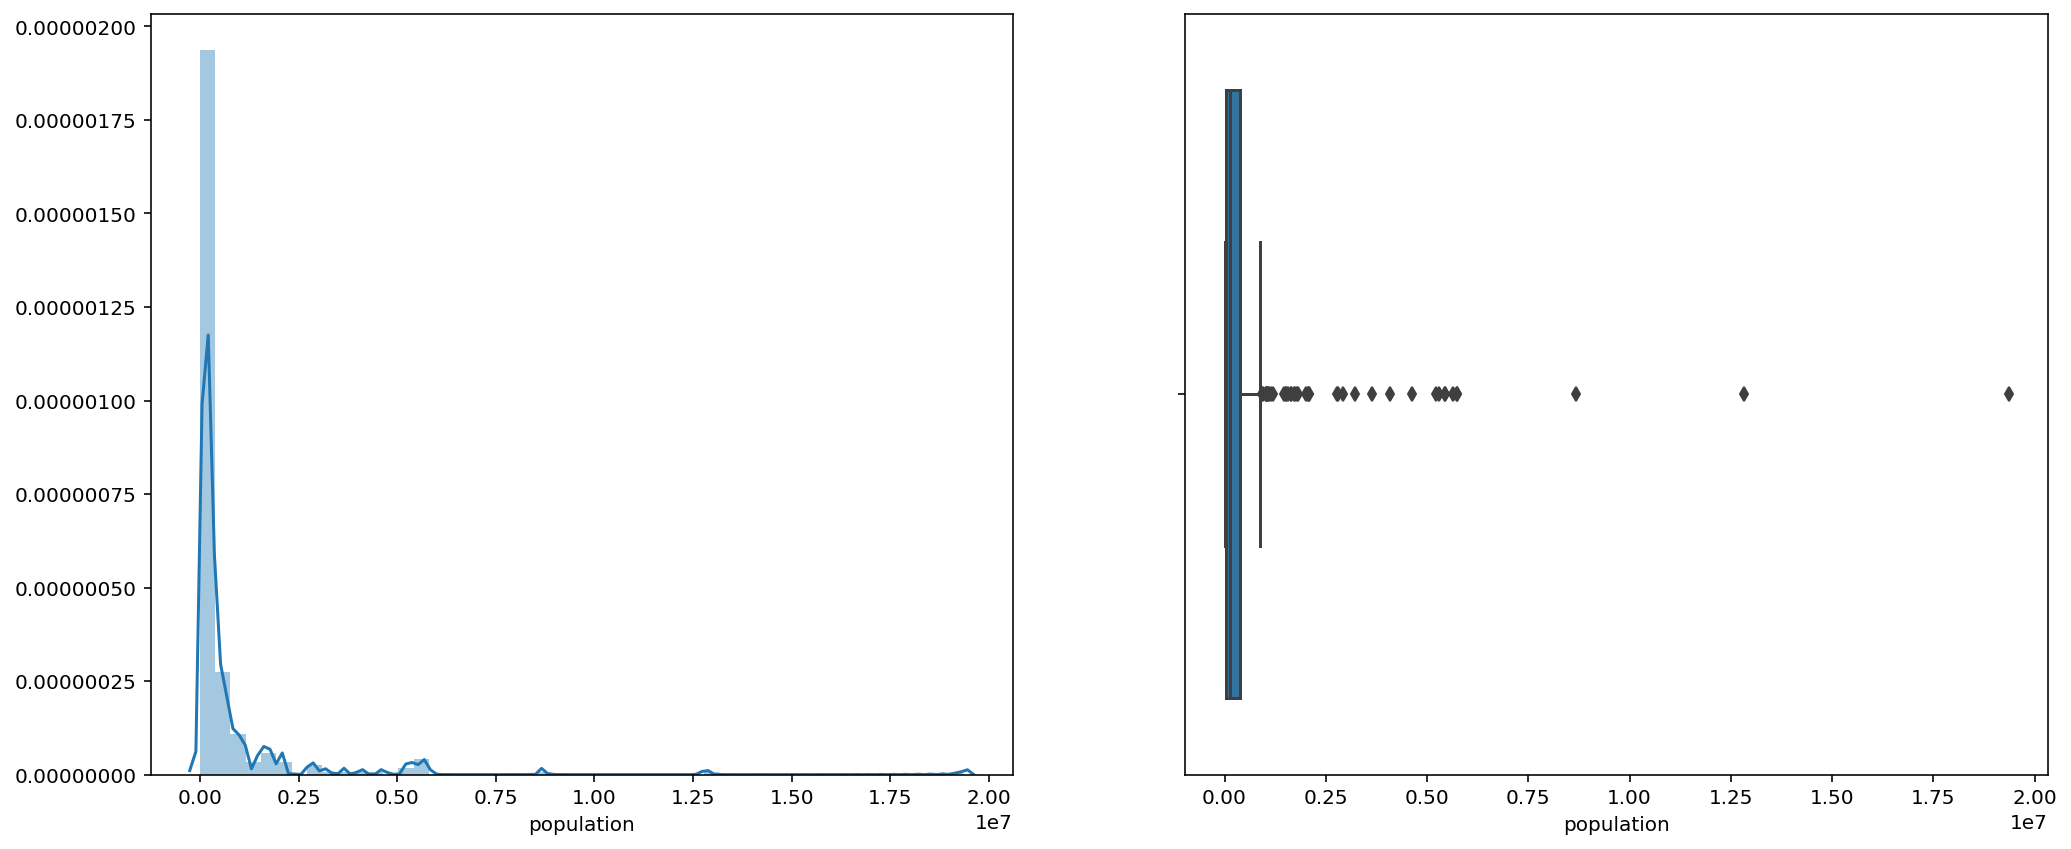

In [92]:
plt.subplot(1, 2, 1)
sns.distplot(merged_X_df["population"]);
plt.subplot(1, 2, 2)
sns.boxplot(x="population", data=merged_X_df);

In [93]:
# deal with outliers

In [94]:
merged_X_df["population"].describe()

count    3.120000e+02
mean     5.937735e+05
std      1.677994e+06
min      1.320000e+02
25%      4.003400e+04
50%      1.252830e+05
75%      3.861690e+05
max      1.935492e+07
Name: population, dtype: float64

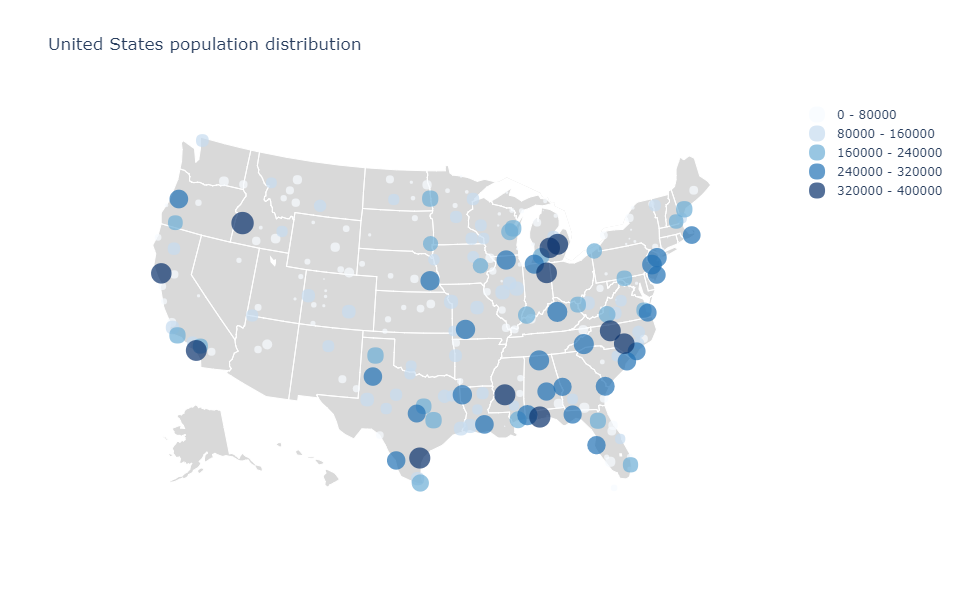

In [99]:
fig = generate_bubble_map(merged_X_df[merged_X_df["population"] < 386000], #unfinished (just approximately) --YD
                          column="population",
                          limits=[(0,80000),(80000,160000),(160000,240000),(240000,320000),(320000,400000)],
                          color="blue",
                          title='United States population distribution')
#fig.show()
fig.write_image("images/population.png",width=960,height=600)
display(Image(filename='images/population.png'))

### Departure ~ Arrival preformance corrolation
We basically divided y into departure performance and arrival performance. Will they differ significently? In other words, are departure performance corrolated with arriving performance? 

In [42]:
dep_arr_corr_df = merged_X_df.loc[:,["total_departure","total_arrival","total_departure_lg10","total_arrival_lg10",
                                     "averge_departure_distance","averge_arrival_distance"]].merge(Y.loc[:,["average_departure_delay","average_arrival_delay"]],left_index=True,right_index=True)

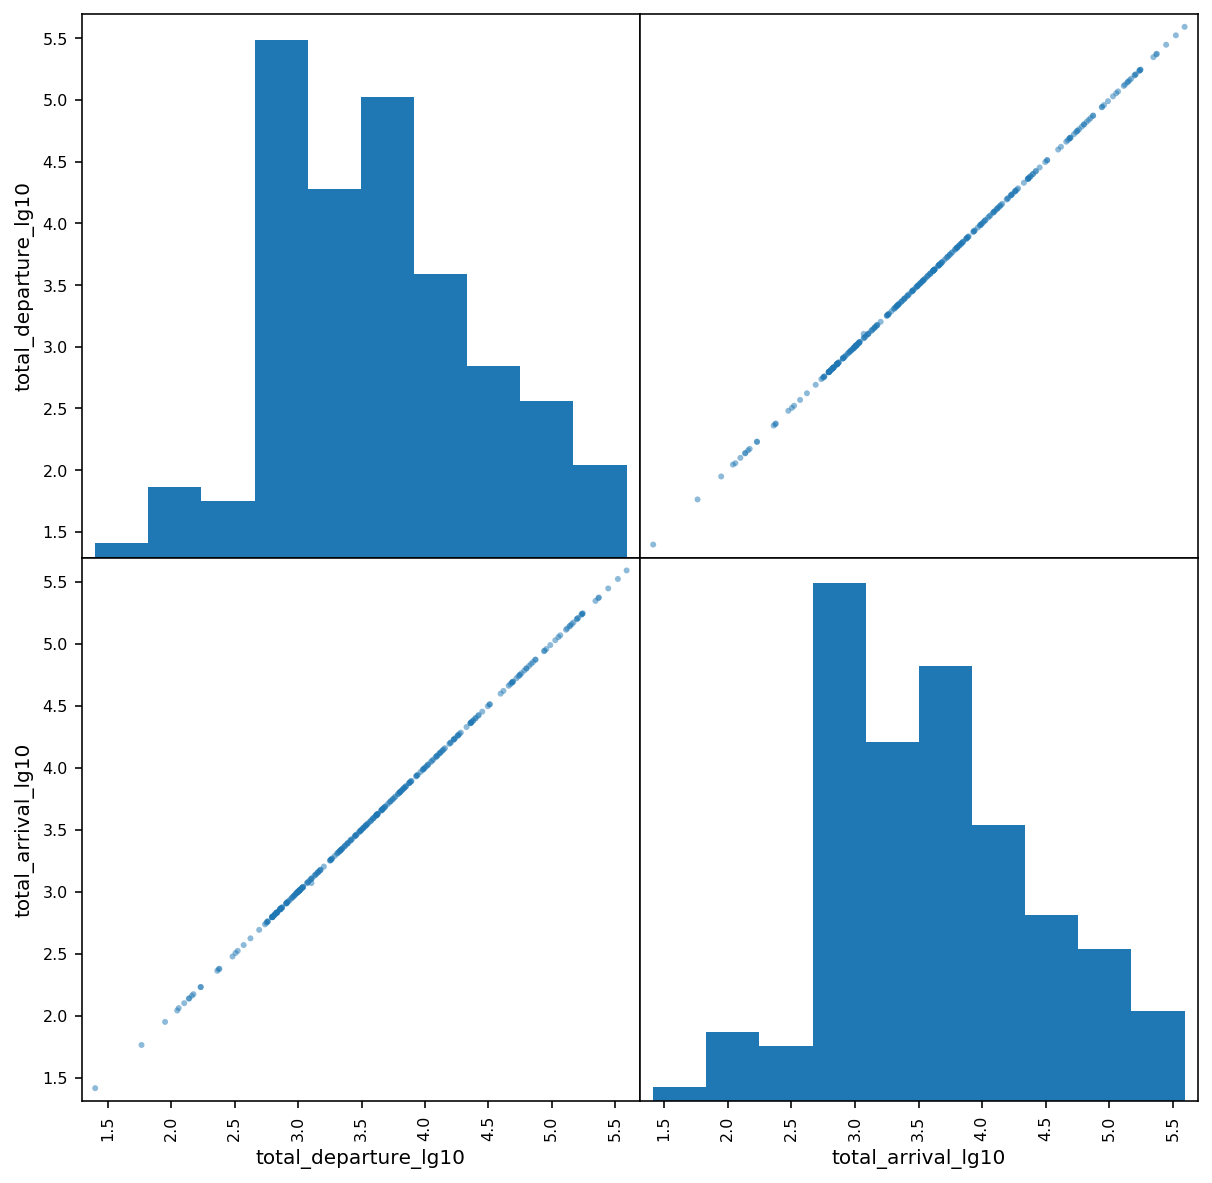

In [43]:
fig = pd.plotting.scatter_matrix(dep_arr_corr_df.loc[:,["total_departure_lg10","total_arrival_lg10"]],figsize=(10,10))

In [44]:
dep_arr_corr_df.loc[:,["total_departure_lg10","total_arrival_lg10"]].corr()

,total_departure_lg10,total_arrival_lg10
total_departure_lg10,1.000000,0.999996
total_arrival_lg10,0.999996,1.000000


By the above corrolation value, there's a nearly perfectly corrolated relationship between total departure count and total arrival count.This is logical: every plane that went into an airport must come out. **Therefore, a (almost) perfect linear relationship indicates the dataset captures flights completely. There's no airport with biased departure and arrival recording in this dataset, or, outliers**.  

In [45]:
alpha = 0.01
st_dep,p_dep = stats.normaltest(dep_arr_corr_df["total_departure_lg10"].values)
st_arr,p_arr = stats.normaltest(dep_arr_corr_df["total_arrival_lg10"].values)
print("P-value for departure_lg10 is :\t",p_dep,"is it normal under alpha =",alpha,"? - ",p_dep>alpha)
print("P-value for arrival_lg10 is :\t",p_arr,"is it normal under alpha =",alpha,"? - ",p_arr>alpha)

P-value for departure_lg10 is :	 0.04026940656087828 is it normal under alpha = 0.01 ? -  True
P-value for arrival_lg10 is :	 0.03808079394451158 is it normal under alpha = 0.01 ? -  True


They are:
- Linear related: corrolation near 1
- Normally distributed: as tested
- Homoscedasic: the graph looks consistent
- Not auto-corrolated: although arrival depends on departure, but departure value in one airport is unlikely to affect the departure value of another airport.
- Multicollinearity: this is not a multivariate regression

Therefore we can conduct a linear regression to see is there's a biased departure and arrival recording. This is different from above: no outliers indicated no individual airport have significently different departure / arrival ratio from other airports. Now we want to test is the ratio 1.

In [46]:
outcome_1,predictors_1 = patsy.dmatrices('total_arrival_lg10 ~ total_departure_lg10',dep_arr_corr_df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:     total_arrival_lg10   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.742e+07
Date:                Sun, 08 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:22:16   Log-Likelihood:                 1453.2
No. Observations:                 312   AIC:                            -2902.
Df Residuals:                     310   BIC:                            -2895.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0004 

The effect size is **0.9999**. i.e. For any increase in log10(departure), we have >0.975 confidence that there will be 0.9999 \* that amount of increase in log10(arrival). **Departure and arrival is not biased.** However, they're also not identical: the intercept is 0.0004, which shows arrival value is slightly greater then departure. This is also logical: a plane must arrive before it can depart, but it can rest in a airport for a short amount of time before departing. This dataset contains data for 2018. If the plane arrives at 2018 and leaves not until 2009, there will be a net arrival surplus. Afterall, this number is small enough to ignore.

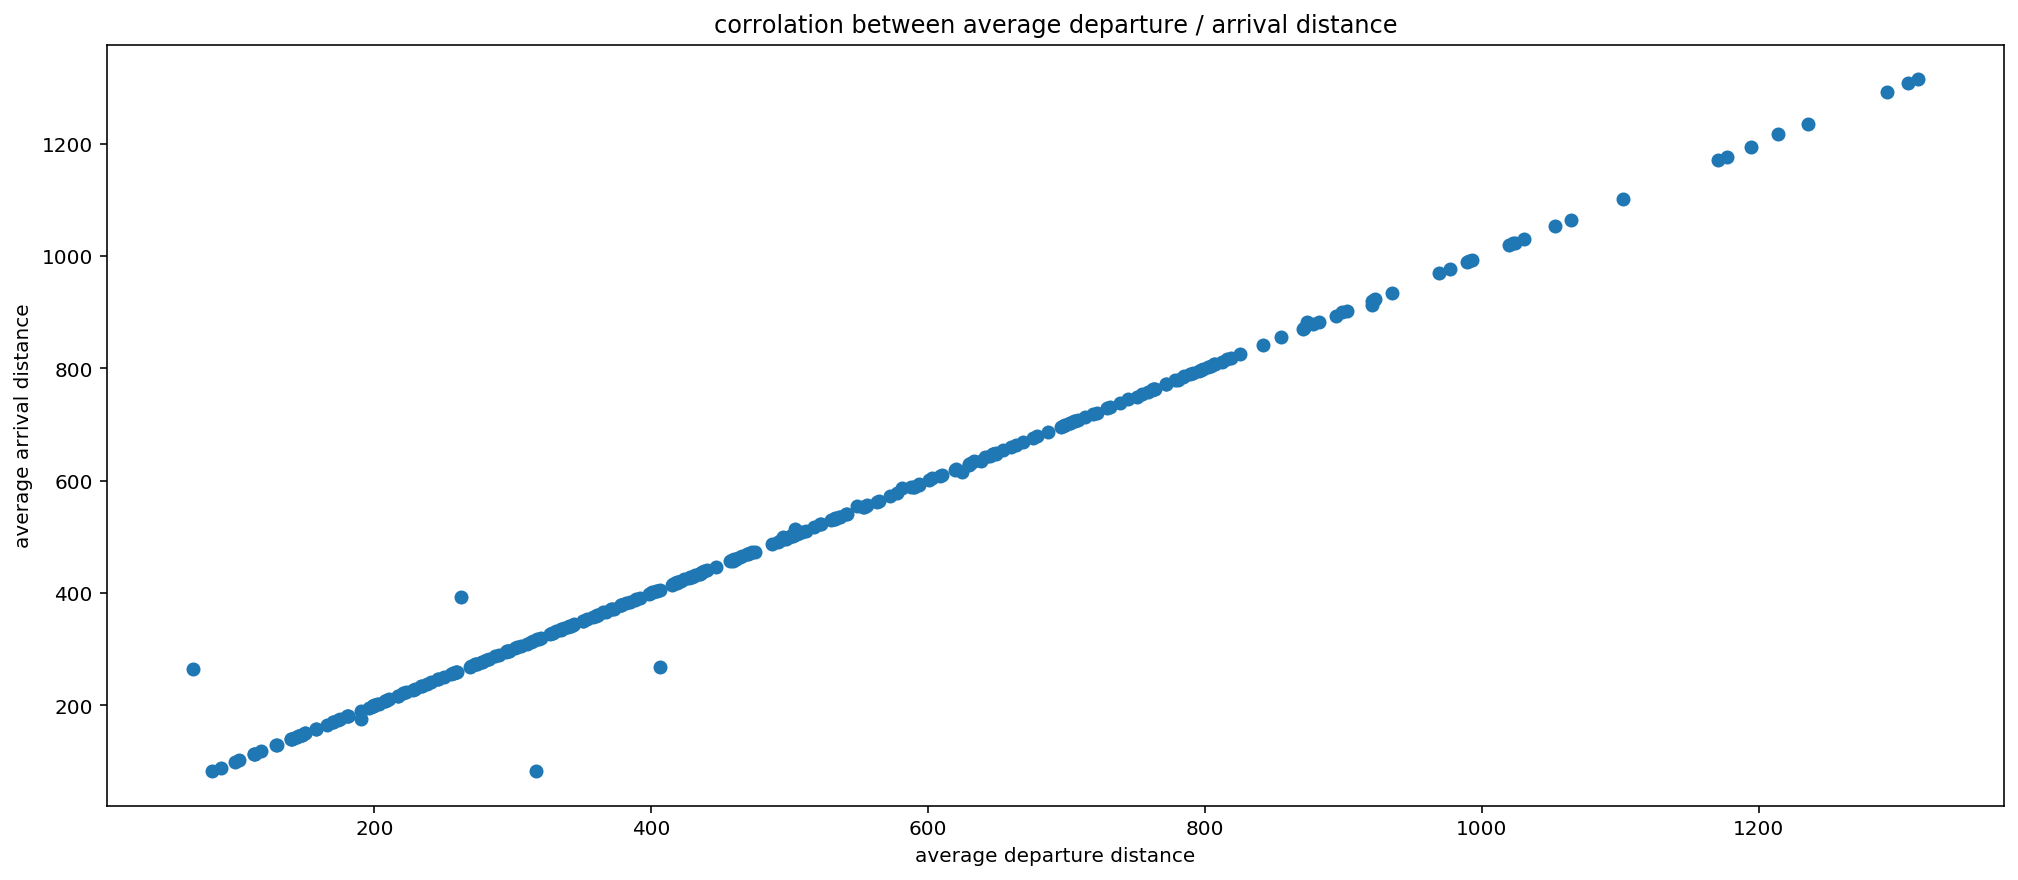

In [47]:
fig1 = plt.scatter(dep_arr_corr_df["averge_departure_distance"],dep_arr_corr_df["averge_arrival_distance"])
plt.title("corrolation between average departure / arrival distance")
plt.xlabel("average departure distance")
plt.ylabel("average arrival distance");

There's an overall linear relationship between average departure and arrival distance. This could be explained by "for any pair of cities, there often exists airlines that goto and come back from destination." 

Corrolation:  0.6304324907623624


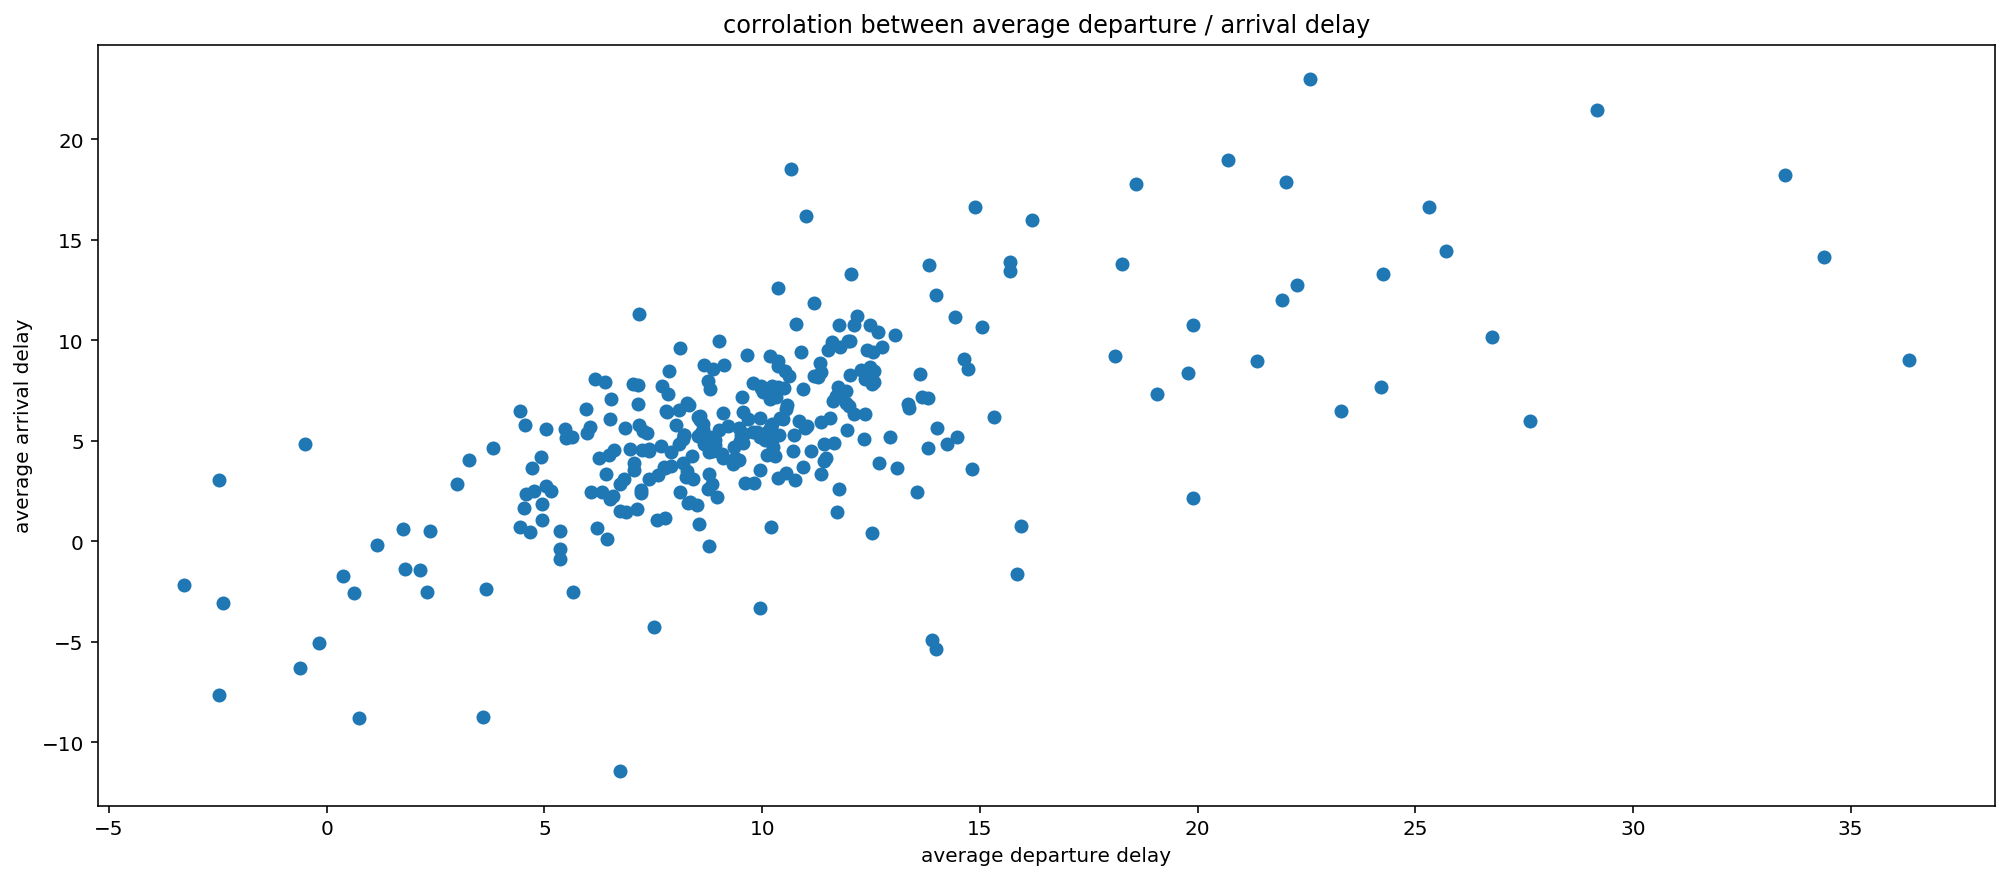

In [48]:
fig1 = plt.scatter(dep_arr_corr_df["average_departure_delay"],dep_arr_corr_df["average_arrival_delay"])
plt.title("corrolation between average departure / arrival delay")
plt.xlabel("average departure delay")
plt.ylabel("average arrival delay");
print("Corrolation: ",np.corrcoef(dep_arr_corr_df["average_departure_delay"],dep_arr_corr_df["average_arrival_delay"])[1][0])

Departure delay and arrival delay is weakly corrolated. Therefore, we need to analyze departure delay and arrival delay separately.  

### Geospatial distribution
Are our predictor variables corrolated with location? Are our outcome variables corrolated with location? In other words, is location the covariate behind possible corrolation between our predictor variables and airline delay?

In [49]:
def generate_bubble_map(df,column,limits,color,title,scale=1):

    if not (column in df.columns):
        print("column \""+column+"\"","not found in dataframe")
        return
    
    if not ('longitude' in df.columns and 'latitude' in df.columns):
        print("longitude or latitude not present in df")
        return
    if not (limits[0][0] <= df[column].min()):
        print("lower limit is higher then some of the rows")
        print("df[" + column + "].min()=",df[column].min())
    
    if not (limits[len(limits)-1][1] >= df[column].max()):
        print("upper limit is lower then some of the rows")
        print("df[" + column + "].max()=",df[column].max())
    
    #preprocess color
    colorseries={
        "blue":["#f7fbff", "#ebf3fb", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
                "#85bcdb", "#6baed6", "#57a0ce", "#3082be", "#2171b5", "#1361a9",
                "#08519c", "#0b4083", "#08306b"],
        "gray":["#ffffff","#eeeeee","#dddddd","#cccccc","#bbbbbb","#aaaaaa","#999999","#888888"],
        "thermal":["#00000a","#000014","#00001e","#000025","#00002a","#00002e","#000032","#000036","#00003a","#00003e","#000042","#000046","#00004a","#00004f","#000052","#010055","#010057","#020059","#02005c","#03005e","#040061","#040063","#050065","#060067","#070069","#08006b","#09006e","#0a0070","#0b0073","#0c0074","#0d0075","#0d0076","#0e0077","#100078","#120079","#13007b","#15007c","#17007d","#19007e","#1b0080","#1c0081","#1e0083","#200084","#220085","#240086","#260087","#280089","#2a0089","#2c008a","#2e008b","#30008c","#32008d","#34008e","#36008e","#38008f","#390090","#3b0091","#3c0092","#3e0093","#3f0093","#410094","#420095","#440095","#450096","#470096","#490096","#4a0096","#4c0097","#4e0097","#4f0097","#510097","#520098","#540098","#560098","#580099","#5a0099","#5c0099","#5d009a","#5f009a","#61009b","#63009b","#64009b","#66009b","#68009b","#6a009b","#6c009c","#6d009c","#6f009c","#70009c","#71009d","#73009d","#75009d","#77009d","#78009d","#7a009d","#7c009d","#7e009d","#7f009d","#81009d","#83009d","#84009d","#86009d","#87009d","#89009d","#8a009d","#8b009d","#8d009d","#8f009c","#91009c","#93009c","#95009c","#96009b","#98009b","#99009b","#9b009b","#9c009b","#9d009b","#9f009b","#a0009b","#a2009b","#a3009b","#a4009b","#a6009a","#a7009a","#a8009a","#a90099","#aa0099","#ab0099","#ad0099","#ae0198","#af0198","#b00198","#b00198","#b10197","#b20197","#b30196","#b40296","#b50295","#b60295","#b70395","#b80395","#b90495","#ba0495","#ba0494","#bb0593","#bc0593","#bd0593","#be0692","#bf0692","#bf0692","#c00791","#c00791","#c10890","#c10990","#c20a8f","#c30a8e","#c30b8e","#c40c8d","#c50c8c","#c60d8b","#c60e8a","#c70f89","#c81088","#c91187","#ca1286","#ca1385","#cb1385","#cb1484","#cc1582","#cd1681","#ce1780","#ce187e","#cf187c","#cf197b","#d01a79","#d11b78","#d11c76","#d21c75","#d21d74","#d31e72","#d32071","#d4216f","#d4226e","#d5236b","#d52469","#d62567","#d72665","#d82764","#d82862","#d92a60","#da2b5e","#da2c5c","#db2e5a","#db2f57","#dc2f54","#dd3051","#dd314e","#de324a","#de3347","#df3444","#df3541","#df363d","#e0373a","#e03837","#e03933","#e13a30","#e23b2d","#e23c2a","#e33d26","#e33e23","#e43f20","#e4411d","#e4421c","#e5431b","#e54419","#e54518","#e64616","#e74715","#e74814","#e74913","#e84a12","#e84c10","#e84c0f","#e94d0e","#e94d0d","#ea4e0c","#ea4f0c","#eb500b","#eb510a","#eb520a","#eb5309","#ec5409","#ec5608","#ec5708","#ec5808","#ed5907","#ed5a07","#ed5b06","#ee5c06","#ee5c05","#ee5d05","#ee5e05","#ef5f04","#ef6004","#ef6104","#ef6204","#f06303","#f06403","#f06503","#f16603","#f16603","#f16703","#f16803","#f16902","#f16a02","#f16b02","#f16b02","#f26c01","#f26d01","#f26e01","#f36f01","#f37001","#f37101","#f37201","#f47300","#f47400","#f47500","#f47600","#f47700","#f47800","#f47a00","#f57b00","#f57c00","#f57e00","#f57f00","#f68000","#f68100","#f68200","#f78300","#f78400","#f78500","#f78600","#f88700","#f88800","#f88800","#f88900","#f88a00","#f88b00","#f88c00","#f98d00","#f98d00","#f98e00","#f98f00","#f99000","#f99100","#f99200","#f99300","#fa9400","#fa9500","#fa9600","#fb9800","#fb9900","#fb9a00","#fb9c00","#fc9d00","#fc9f00","#fca000","#fca100","#fda200","#fda300","#fda400","#fda600","#fda700","#fda800","#fdaa00","#fdab00","#fdac00","#fdad00","#fdae00","#feaf00","#feb000","#feb100","#feb200","#feb300","#feb400","#feb500","#feb600","#feb800","#feb900","#feb900","#feba00","#febb00","#febc00","#febd00","#febe00","#fec000","#fec100","#fec200","#fec300","#fec400","#fec500","#fec600","#fec700","#fec800","#fec901","#feca01","#feca01","#fecb01","#fecc02","#fecd02","#fece03","#fecf04","#fecf04","#fed005","#fed106","#fed308","#fed409","#fed50a","#fed60a","#fed70b","#fed80c","#fed90d","#ffda0e","#ffda0e","#ffdb10","#ffdc12","#ffdc14","#ffdd16","#ffde19","#ffde1b","#ffdf1e","#ffe020","#ffe122","#ffe224","#ffe226","#ffe328","#ffe42b","#ffe42e","#ffe531","#ffe635","#ffe638","#ffe73c","#ffe83f","#ffe943","#ffea46","#ffeb49","#ffeb4d","#ffec50","#ffed54","#ffee57","#ffee5b","#ffee5f","#ffef63","#ffef67","#fff06a","#fff06e","#fff172","#fff177","#fff17b","#fff280","#fff285","#fff28a","#fff38e","#fff492","#fff496","#fff49a","#fff59e","#fff5a2","#fff5a6","#fff6aa","#fff6af","#fff7b3","#fff7b6","#fff8ba","#fff8bd","#fff8c1","#fff8c4","#fff9c7","#fff9ca","#fff9cd","#fffad1","#fffad4","#fffbd8","#fffcdb","#fffcdf","#fffde2","#fffde5","#fffde8","#fffeeb","#fffeee","#fffef1","#fffef4","#fffff6"],
        "black":["#bbbbbb","#aaaaaa","#999999","#888888","#777777","#666666","#555555","#444444","#333333","#222222","#111111","#000000"]
    }
    colors = list()
    inds = list(np.linspace(0,len(colorseries[color])-1,len(limits)).astype("int"))
    for i in inds:
        colors.append(colorseries[color][i])
        
    scale *= 250 / (df[column].max() - df[column].min())
    
    fig = go.Figure()
    for i in range(len(limits)):
        lim = limits[i]
        df_sub = df[(lim[0]<=df[column]) & (df[column]<lim[1])]
        fig.add_trace(go.Scattergeo(
            locationmode = 'USA-states',
            lon = df_sub['longitude'],
            lat = df_sub['latitude'],
            text = df_sub.index,
            marker = dict(
                size = (df_sub[column] - df[column].min())*scale, # ensure size is positive
                color = colors[i],
                line_color='rgb(40,40,40)',
                line_width=0,
                sizemode = 'area'
            ),
            name = '{0} - {1}'.format(lim[0],lim[1])))

    fig.update_layout(
            title_text = title,
            showlegend = True,
            geo = dict(
                scope = 'usa',
                landcolor = 'rgb(217, 217, 217)',
            )
        )
    return fig

### Outcome variables

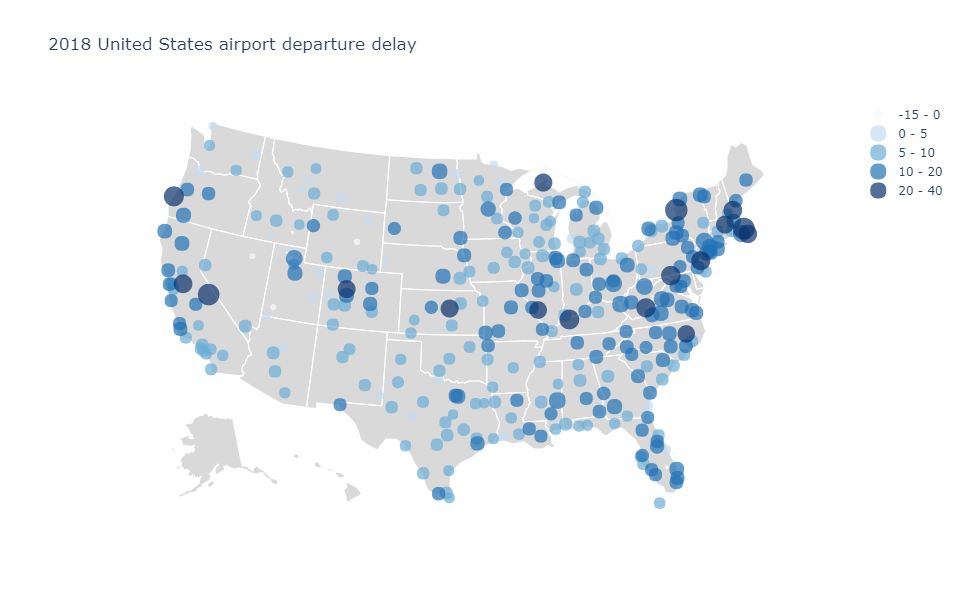

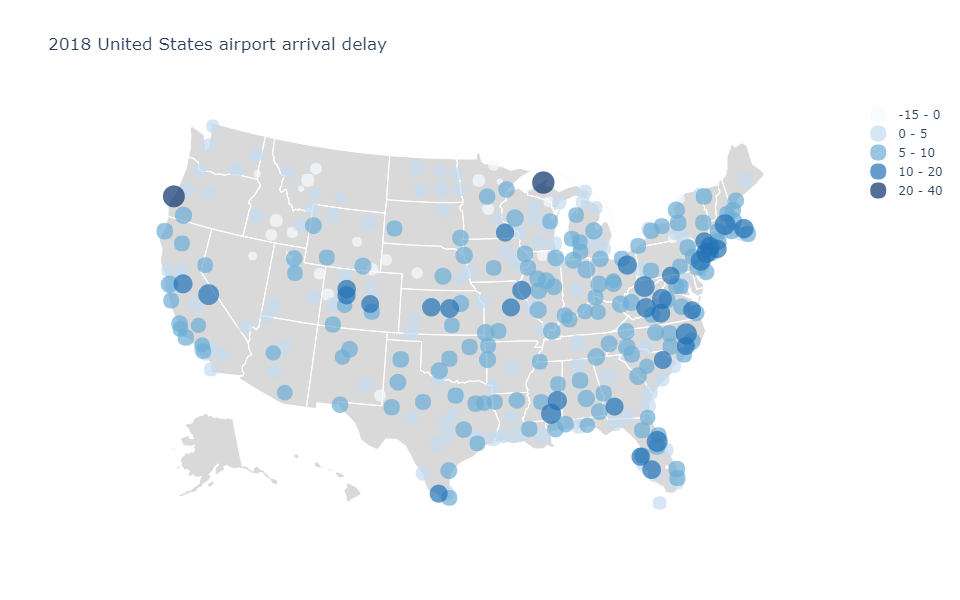

In [50]:
fig1 = generate_bubble_map(Y.merge(merged_X_df[["latitude","longitude"]],left_index=True,right_index=True),
                          column="average_departure_delay",
                          limits=[(-15,0),(0,5),(5,10),(10,20),(20,40)],
                          color="blue",
                          title='2018 United States airport departure delay')
#fig1.show()
fig1.write_image("images/dep_delay.png",width=960,height=600)

fig2 = generate_bubble_map(Y.merge(merged_X_df[["latitude","longitude"]],left_index=True,right_index=True),
                          column="average_arrival_delay",
                          limits=[(-15,0),(0,5),(5,10),(10,20),(20,40)],
                          color="blue",
                          title='2018 United States airport arrival delay')
#fig2.show()
fig2.write_image("images/arr_delay.png",width=960,height=600)
display(Image(filename='images/dep_delay.png'))
display(Image(filename='images/arr_delay.png'))

From the above figure, we can see the following information
- Arrival delay is overall less then departure delay
    - When delayed by the originating airport, pilots would typically cruise at a faster speed to catch up with the schedule.
    
    
- Triangular region(From center of Nevada to U.S. - Canadian boarder) in the upper left region have less departure and arrival delay. 
    - Need to find out what variable is corrolated with this region
    
    
- Both departure / arrival delay distributed along horizontal line near the center 

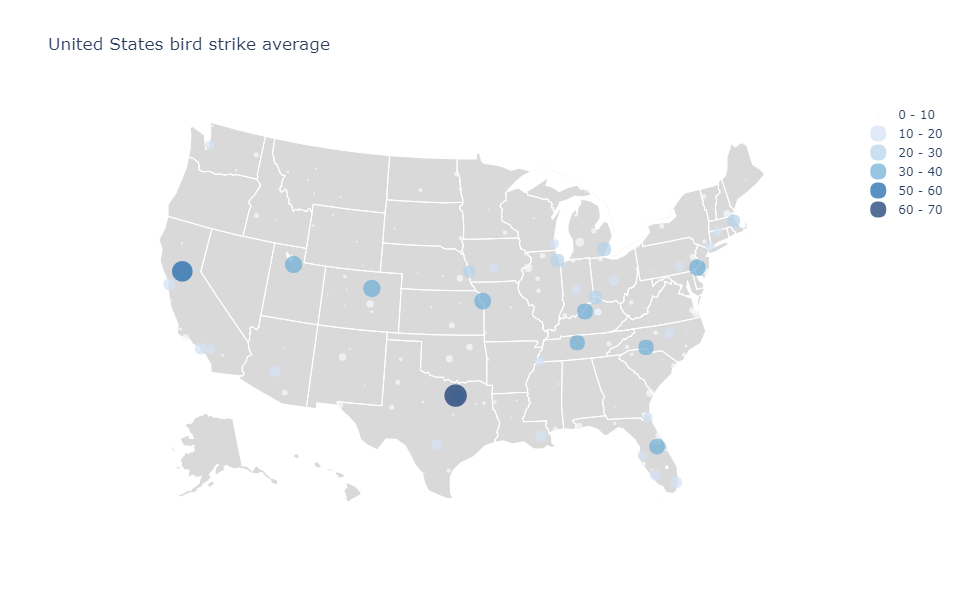

In [51]:
fig = generate_bubble_map(merged_X_df,
                          column="strike_avg",
                          limits=[(0,10),(10,20),(20,30),(30,40),(40,50),(50,60),(60,70)],
                          color="blue",
                          title='United States bird strike average')
fig.write_image("images/bird.png",width=960,height=600)
display(Image(filename='images/bird.png'))